# **Lab 02: Khai thác và trực quan hóa dữ liệu**

### **Danh sách các thành viên**

<center>

|         Họ tên         |   MSSV   |
| :--------------------- | :------: |
| Trần Nguyễn Nhật Cường | 22127048 |
|    Nguyễn Công Tuấn    | 22127436 |
|     Trần Đăng Tuấn     | 22127438 |

</center>

## **Cài đặt và sử dụng các thư viện cần thiết**

In [ ]:
%pip install matplotlib pandas seaborn kaggle scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import zipfile
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = "{:.2f}".format

**`matplotlib`** được dùng để vẽ biểu đồ trong Python. Có thể dùng để vẽ các loại biểu đồ như
histogram, biểu đồ tán xạ (scatter plot), biểu đồ đường (line chart) và biểu đồ cột (bar chart),...

**`pandas`** được dùng để xử lý và phân tích dữ liệu dạng bảng và cung cấp cấu trúc dữ liệu như
DataFrame và Series để dễ thao tác

**`seaborn`** dùng để vẽ biểu đồ dựa trên thư viện matplotlib nhưng biểu đồ sẽ trông đẹp hơn và cũng hỗ trợ các loại biểu đồ thống kê như violin plot, box plot, heatmap

**`sklearn (scikit-learn)`** là thư viện học máy phổ biến trong Python, được sử dụng để thực hiện các tác vụ học máy và xử lý dữ liệu. Trong đồ án này, các thành phần sau của sklearn được sử dụng:
- **`sklearn.cluster.KMeans`**: Cung cấp thuật toán KMeans để gom nhóm dữ liệu thành các cụm dựa trên sự tương đồng, được sử dụng để phân loại các nền kinh tế thành các nhóm.
- **`sklearn.metrics.silhouette_score`**: Dùng để tính điểm Silhouette, một chỉ số đánh giá chất lượng của việc gom nhóm, giúp xác định số lượng cụm tối ưu bằng cách đo lường mức độ tách biệt giữa các cụm.
- **`sklearn.preprocessing.StandardScaler`**: Dùng để chuẩn hóa dữ liệu, đưa các giá trị về cùng thang đo (trung bình bằng 0 và độ lệch chuẩn bằng 1), đảm bảo các chỉ số kinh tế có trọng số công bằng khi áp dụng thuật toán gom nhóm.

## **Thu thập dữ liệu**

*Nền tảng thu thập* - *Kaggle*

*Tên bộ dữ liệu thu thập* - Student Depression Dataset: Analyzing Mental Health Trends and Predictors Among Students

*Thông tin về bộ dữ liệu* - Bộ dữ liệu này được tổng hợp từ nhiều nguồn khác nhau nhằm mục đích phân tích và dự đoán mức độ trầm cảm ở sinh viên. Nó được thiết kế phục vụ nghiên cứu trong các lĩnh vực tâm lý học, khoa học dữ liệu và giáo dục. Bộ dữ liệu cung cấp những hiểu biết quan trọng về các yếu tố góp phần vào các vấn đề sức khỏe tâm thần của sinh viên, từ đó hỗ trợ xây dựng các chiến lược can thiệp sớm và cải thiện sức khỏe tinh thần cho đối tượng này.

In [ ]:
!kaggle datasets download -d adilshamim8/education-and-career-success -p ./

In [25]:

zip_file_path = './education-and-career-success.zip'  
extracted_folder = './education-and-career-success' 

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)
    os.remove(zip_file_path)


csv_file_path = os.path.join(extracted_folder, 'education_and_career_success.csv') 

Dataset URL: https://www.kaggle.com/datasets/adilshamim8/education-and-career-success
License(s): other
education-and-career-success.zip: Skipping, found more recently modified local copy (use --force to force download)


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: './education-and-career-success.zip'

## **Đọc bộ dữ liệu**

In [4]:
X = students.iloc[:, :-1]  # Tất cả các cột ngoại trừ cột cuối
y = students.iloc[:, -1]   # Cột cuối là nhãn

NameError: name 'students' is not defined

In [ ]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.00,1.62,64.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation
1,Female,21.00,1.52,56.00,yes,no,3.00,3.00,Sometimes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation
2,Male,23.00,1.80,77.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,2.00,1.00,Frequently,Public_Transportation
3,Male,27.00,1.80,87.00,no,no,3.00,3.00,Sometimes,no,2.00,no,2.00,0.00,Frequently,Walking
4,Male,22.00,1.78,89.80,no,no,2.00,1.00,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation


In [ ]:
y.head()

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II


## **Tiền xử lý dữ liệu**

### **Ánh xạ (mapping) lại các giá trị của bộ dữ liệu**

**Mục đích**: Bộ dữ liệu về nấm sử dụng các ký hiệu chữ cái thay vì các giá trị có ý nghĩa. Vì vậy việc ánh xạ (mapping) lại giúp chuyển đổi các ký hiệu này thành dạng mô tả dễ hiểu hơn, giúp việc phân tích dữ liệu trở nên trực quan hơn.

**Các thực hiện**:

1. Xác định các cột cần được ánh xạ.
2. Tạo một dictionary `mapping_dict` để lưu trữ ánh xạ giữa ký hiệu chữ cái và giá trị thực tế.
3. Duyệt qua từng cột trong tập dữ liệu và sử dụng `.map()` để thay thế giá trị ký hiệu bằng giá trị có ý nghĩa.
4. Lưu lại kết quả vào chính cột tương ứng trong DataFrame.

In [ ]:
for col in X.columns:
    print(f"{col}: {X[col].unique()}")
    print("------")
    
print(f"{y.columns[0]}: {y[y.columns[0]].unique()}")
print("------")

# Define mapping dictionaries
feature_mappings = {
    "cap-shape": {"x": "convex", "b": "bell", "s": "sunken", "f": "flat", "k": "knobbed", "c": "conical"},
    "cap-surface": {"s": "smooth", "y": "scaly", "f": "fibrous", "g": "grooves"},
    "cap-color": {"n": "brown", "y": "yellow", "w": "white", "g": "gray", "e": "red", "p": "pink", "b": "buff", "u": "purple", "c": "cinnamon", "r": "green"},
    "bruises": {"t": "bruises", "f": "no"},
    "odor": {"p": "pungent", "a": "almond", "l": "anise", "n": "none", "f": "foul", "c": "creosote", "y": "fishy", "s": "spicy", "m": "musty"},
    "gill-attachment": {"f": "free", "a": "attached"},
    "gill-spacing": {"c": "close", "w": "crowded"},
    "gill-size": {"n": "narrow", "b": "broad"},
    "gill-color": {"k": "black", "n": "brown", "g": "gray", "p": "pink", "w": "white", "h": "chocolate", "u": "purple", "e": "red", "b": "buff", "r": "green", "y": "yellow", "o": "orange"},
    "stalk-shape": {"e": "enlarging", "t": "tapering"},
    "stalk-root": {"e": "equal", "c": "club", "b": "bulbous", "r": "rhizomorphs", None: "missing"},
    "stalk-surface-above-ring": {"s": "smooth", "f": "fibrous", "k": "silky", "y": "scaly"},
    "stalk-surface-below-ring": {"s": "smooth", "f": "fibrous", "y": "scaly", "k": "silky"},
    "stalk-color-above-ring": {"w": "white", "g": "gray", "p": "pink", "n": "brown", "b": "buff", "e": "red", "o": "orange", "c": "cinnamon", "y": "yellow"},
    "stalk-color-below-ring": {"w": "white", "p": "pink", "g": "gray", "b": "buff", "n": "brown", "e": "red", "y": "yellow", "o": "orange", "c": "cinnamon"},
    "veil-type": {"p": "partial"},
    "veil-color": {"w": "white", "n": "brown", "o": "orange", "y": "yellow"},
    "ring-number": {"o": "one", "t": "two", "n": "none"},
    "ring-type": {"p": "pendant", "e": "evanescent", "l": "large", "f": "flaring", "n": "none"},
    "spore-print-color": {"k": "black", "n": "brown", "u": "purple", "h": "chocolate", "w": "white", "r": "green", "o": "orange", "y": "yellow", "b": "buff"},
    "population": {"s": "scattered", "n": "numerous", "a": "abundant", "v": "several", "y": "solitary", "c": "clustered"},
    "habitat": {"u": "urban", "g": "grasses", "m": "meadows", "d": "woods", "p": "paths", "w": "waste", "l": "leaves"}
}

target_mapping = {
    "poisonous": {"p": "poisonous", "e": "edible"}
}

# Apply mappings
X = X.replace(feature_mappings)
y = y.replace(target_mapping)

cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
------
cap-surface: ['s' 'y' 'f' 'g']
------
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
------
bruises: ['t' 'f']
------
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
------
gill-attachment: ['f' 'a']
------
gill-spacing: ['c' 'w']
------
gill-size: ['n' 'b']
------
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
------
stalk-shape: ['e' 't']
------
stalk-root: ['e' 'c' 'b' 'r' nan]
------
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
------
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
------
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
------
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
------
veil-type: ['p']
------
veil-color: ['w' 'n' 'o' 'y']
------
ring-number: ['o' 't' 'n']
------
ring-type: ['p' 'e' 'l' 'f' 'n']
------
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
------
population: ['s' 'n' 'a' 'v' 'y' 'c']
------
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']
------
poisonous: ['p' 'e

In [ ]:
for col in X.columns:
    print(f"{col}: {X[col].unique()}")
    print("------")
    
print(f"{y.columns[0]}: {y[y.columns[0]].unique()}")
print("------")

cap-shape: ['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']
------
cap-surface: ['smooth' 'scaly' 'fibrous' 'grooves']
------
cap-color: ['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']
------
bruises: ['bruises' 'no']
------
odor: ['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']
------
gill-attachment: ['free' 'attached']
------
gill-spacing: ['close' 'crowded']
------
gill-size: ['narrow' 'broad']
------
gill-color: ['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange']
------
stalk-shape: ['enlarging' 'tapering']
------
stalk-root: ['equal' 'club' 'bulbous' 'rhizomorphs' 'missing']
------
stalk-surface-above-ring: ['smooth' 'fibrous' 'silky' 'scaly']
------
stalk-surface-below-ring: ['smooth' 'fibrous' 'scaly' 'silky']
------
stalk-color-above-ring: ['white' 'gray' 'pink' 'brown' 'buff' 'red' 'orange' 'cinnamon' 'yellow']
------
stalk-color-below-ring: ['white' 'pink' '

### **Xử lý dữ liệu bị thiếu**

**Mục đích**: Giảm thiểu ảnh hưởng của dữ liệu bị thiếu đối với quá trình phân tích và mô hình hóa và đảm bảo dữ liệu nhất quán, không bị mất mát quá nhiều thông tin.

**Các thực hiện**:

1. Xác định các cột có giá trị bị thiếu.
2. Phân tích phân bố dữ liệu của cột bị thiếu.
3. Đưa ra chiến lược xử lý dữ liệu bị thiếu (đọc **Nhận xét**).
4. Thực hiện thay thế giá trị bị thiếu.

In [ ]:
missing_values = X.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print("Các cột chứa dữ liệu bị mất và số lượng dòng bị thiếu:")
print(missing_columns)

Các cột chứa dữ liệu bị mất và số lượng dòng bị thiếu:
Series([], dtype: int64)


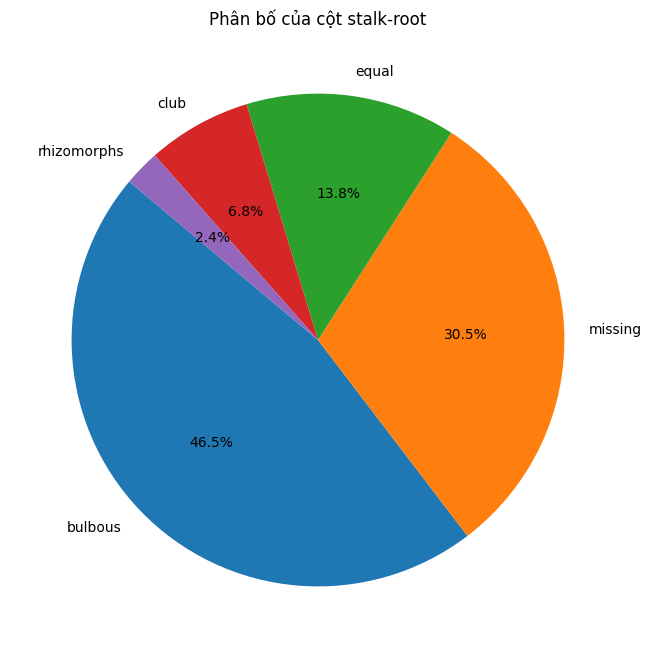

In [ ]:
stalk_root_counts = X["stalk-root"].value_counts(dropna=False)

plt.figure(figsize=(8, 8))
plt.pie(stalk_root_counts, labels=stalk_root_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Phân bố của cột stalk-root")
plt.show()

**Nhận xét**

Tỷ lệ dữ liệu bị thiếu (nan) của thuộc tính `stalk-root` là 30.5%, khá lớn so với các giá trị còn lại nên nếu chọn việc thay thế các giá trị (nan) bằng mode thì có thể làm sai lệch phân bố dữ liệu hay việc loại bỏ các mẫu chứa dữ liệu bị thiếu thì cũng sẽ làm giảm đi kích thước ban đầu của bộ dữ liệu và dẫn đến việc mất đi các thông tin mà bộ dữ liệu cung cấp.

Bởi thế nên nhóm quyết định sẽ gán giá trị `other` vào các dữ liệu bị thiếu. Nó giúp giải quyết việc giữ lại dữ liệu mà không làm sai lệch phân bố.

In [ ]:
X.loc[:, "stalk-root"] = X["stalk-root"].fillna("other")
print("Số lượng dữ liệu thiếu của thuộc tính 'stalk-root' là" ,X["stalk-root"].isnull().sum()) 

Số lượng dữ liệu thiếu của thuộc tính 'stalk-root' là 0


**Lưu bộ dữ liệu vào file .csv**

In [ ]:
data = pd.concat([X, y], axis=1)
data.to_csv("mushroom_data.csv", index=False)

## **Khám phá dữ liệu**

Bảng bên dưới mô tả chi tiết ý nghĩa của các thuộc tính trong bộ dữ liệu **`Mushroom`**


<center>

| **Tên thuộc tính** | **Mô tả** |
|-------------------|-------------------------------------------------|
| **poisonous**        | Xác định nấm có độc hay không. Giá trị: 'poisonous' (độc) hoặc 'edible' (ăn được). |
| **cap-shape**       | Hình dạng của mũ nấm, có thể là chuông, nón, lồi, phẳng, núm, hoặc lõm. |
| **cap-surface**     | Bề mặt của mũ nấm, có thể là sợi, có rãnh, có vảy hoặc nhẵn. |
| **cap-color**        | Màu sắc của mũ nấm, bao gồm các màu như nâu, vàng, trắng, đỏ, hồng, tím, xanh lá,... |
| **bruises**          | Cho biết nấm có bị bầm dập khi chạm vào hay không. Giá trị: 'bruises' (có) hoặc 'no' (không). |
| **odor**             | Mùi của nấm, có thể là hạnh nhân, hồi, khét, tanh, hôi, mốc, không mùi, hăng hoặc cay. |
| **gill-attachment**  | Cách các phiến nấm gắn vào cuống, có thể là gắn chặt, tự do, rủ xuống hoặc có răng cưa. |
| **gill-spacing**     | Khoảng cách giữa các phiến nấm, có thể là sít, dày hoặc thưa. |
| **gill-size**        | Kích thước của phiến nấm, có thể là rộng hoặc hẹp. |
| **gill-color**       | Màu sắc của phiến nấm, có thể là đen, nâu, buff, chocolate, xám, xanh lá, cam, hồng, tím, đỏ, trắng, vàng. |
| **stalk-shape**      | Hình dạng của cuống nấm, có thể là phình to ở đáy hoặc thuôn nhọn. |
| **stalk-root**       | Kiểu rễ của cuống nấm, có thể là củ, chùm, đế phẳng, sợi rễ hoặc không có thông tin. |
| **stalk-surface-above-ring** | Bề mặt cuống nấm phía trên vòng nấm, có thể là sợi, có vảy, bóng mượt hoặc nhẵn. |
| **stalk-surface-below-ring** | Bề mặt cuống nấm phía dưới vòng nấm, có thể là sợi, có vảy, bóng mượt hoặc nhẵn. |
| **stalk-color-above-ring**   | Màu sắc của cuống nấm phía trên vòng nấm. |
| **stalk-color-below-ring**   | Màu sắc của cuống nấm phía dưới vòng nấm. |
| **veil-type**       | Loại màng che, thường chỉ có giá trị 'partial' (một phần). |
| **veil-color**      | Màu sắc của màng che, có thể là nâu, cam, trắng hoặc vàng. |
| **ring-number**    | Số lượng vòng trên cuống nấm, có thể là không có, một hoặc hai. |
| **ring-type**       | Loại vòng trên cuống nấm, có thể là dạng màng mỏng, lớn, rủ xuống hoặc không có. |
| **spore-print-color** | Màu sắc của bào tử nấm khi in lên giấy, có thể là đen, nâu, buff, chocolate, xanh lá, cam, tím, trắng, vàng. |
| **population**      | Mật độ phát triển của nấm, có thể là rải rác, nhiều, rất nhiều, thành cụm, đơn lẻ hoặc vài cây. |
| **habitat**        | Môi trường sống của nấm, có thể là cỏ, lá rụng, đồng cỏ, ven đường, đô thị, rác thải hoặc rừng. |

</center>



### **Tổng quan về dữ liệu**

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

**Nhận xét về bộ dữ liệu Nấm (tập feature X) sau khi xử lý**
- Dữ liệu còn *8124* dòng và *22* thuộc tính (cột).
- Tất cả các thuộc tính đều có kiểu dữ liệu là object (chuỗi).
- Không có giá trị khuyết thiếu trong bất kỳ thuộc tính nào vì tất cả các cột đều có 8124 giá trị không null.

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   poisonous  8124 non-null   object
dtypes: object(1)
memory usage: 63.6+ KB


**Nhận xét về bộ dữ liệu của Hoa Kỳ *[wdi_2000_2020_USA]* sau khi xử lý**
- Dữ liệu còn *8124* dòng và *22* thuộc tính (cột).
- Tất cả các thuộc tính đều có kiểu dữ liệu là object.
- Không có giá trị khuyết thiếu trong bất kỳ thuộc tính nào vì tất cả các cột đều có 8124 giá trị không null.

## **Các câu hỏi**

#### **Câu 1**: ...


**Thuộc tính được sử dụng**
1. ..
2. ..

**Các bước thực hiện**
1. 
2. 
3.
4. 
5.

**Nhận xét**

